In [9]:
# 1,Initialisation:Initialise the migrant pool with N individuals.
def initialization(n1,n2,n3,n4):
    p1=[{'trait1':'small','trait2':'selfish'}]*n1
    p2=[{'trait1':'large','trait2':'selfish'}]*n2
    p3=[{'trait1':'small','trait2':'cooperative'}]*n3
    p4=[{'trait1':'large','trait2':'cooperative'}]*n4 
    return p1+p2+p3+p4

In [10]:
#2,Group formation (aggregation): Assign individuals in the migrant pool to groups
def assign_groups(groups,population,size):  
    import random
    if len(population)<size and len(population)>0:
        #print( 'not enough individuals for sampling')
        return []
    elif len(population)>=size:            
        index_value = random.sample(list(enumerate(population)), size)
        sample_idx = []
        sample = []
        for idx, val in index_value:
            sample_idx.append(idx)
            sample.append(val)        
        groups.append(sample)            
        population1=[i for j, i in enumerate(population) if j not in sample_idx]    
        #print(population1) #test if the population decreased after sampling without replacement
        assign_groups(groups,population1,size)
        #print(len(population1)<size)#print the boolean value in every recursion
    return groups

In [11]:
#3,Reproduction: Perform reproduction within groups for t time-steps
def reproduction(t,group,Gs,Cs,Gc,Cc,K,R):
    if t==0:
        Ns_0=sum(1 for i in group if i['trait2']=='selfish')
        Nc_0=sum(1 for i in group if i['trait2']=='cooperative')
        return Ns_0,Nc_0 
    else:
        Ns_last,Nc_last=reproduction(t-1,group,Gs,Cs,Gc,Cc,K,R)
        rs=(Ns_last*Gs*Cs*R)/(Ns_last*Gs*Cs+Nc_last*Gc*Cc)
        rc=(Nc_last*Gc*Cc*R)/(Ns_last*Gs*Cs+Nc_last*Gc*Cc)
        Ns_t=Ns_last+rs/Cs-K*Ns_last
        Nc_t=Nc_last+rc/Cc-K*Nc_last
        
    return Ns_t,Nc_t

In [12]:
#4,Migrant pool formation (dispersal): Return the progeny of each group to the migrant pool.
def dispersal(g_snew,g_lnew):
    pool1=[]
    for i in g_snew:  
        pool1=pool1+i

    pool2=[]
    for i in g_lnew:  
        pool2=pool2+i  
    pool=pool1+pool2   
    return pool

In [13]:
#5,Maintaining the global carrying capacity: Rescale the migrant pool back to size N, 
#retaining the proportion of individuals with each genotype
def rescale(pool,initial_p):
    n1=round(sum(1 for i in pool if i['trait1']=='small' and i['trait2']=='selfish')*initial_p/len(pool))
    n2=round(sum(1 for i in pool if i['trait1']=='large' and i['trait2']=='selfish')*initial_p/len(pool))
    n3=round(sum(1 for i in pool if i['trait1']=='small' and i['trait2']=='cooperative')*initial_p/len(pool))
    n4=round(sum(1 for i in pool if i['trait1']=='large' and i['trait2']=='cooperative')*initial_p/len(pool))
    p=[{'trait1':'small','trait2':'selfish'}]*n1+[{'trait1':'large','trait2':'selfish'}]*n2+[{'trait1':'small','trait2':'cooperative'}]*n3+[{'trait1':'large','trait2':'cooperative'}]*n4
    return p,n1/initial_p,n2/initial_p,n3/initial_p,n4/initial_p

In [65]:
#6,Iteration
#1,initialization
i1,i2,i3,i4=1000,1000,1000,1000
i=i1+i2+i3+i4
p=initialization(i1,i2,i3,i4)
Selfish,Large=[(i1+i2)/i],[(i2+i4)/i]#for calculating number of selfish strategy individuals and large groups
Generation,N1,N2,N3,N4=[0],[i1/i],[i2/i],[i3/i],[i4/i]#for calculating the frequency of each genotype

for iteration in range(120):
    #2,Group Formation
    p_s=[i for i in p if i['trait1']=='small']#individuals with trait1 value of 'small'
    p_l=[i for i in p if i['trait1']=='large']#individuals with trait1 value of 'large'

    g_s=assign_groups([],p_s,4)#small groups
    g_l=assign_groups([],p_l,40)#large groups
    #3,Reproduction
    g_snew=[]
    for group in g_s:
        Ns_t=round(reproduction(4,group,0.02,0.2,0.018,0.1,0.1,4)[0])
        Nc_t=round(reproduction(4,group,0.02,0.2,0.018,0.1,0.1,4)[1])
        group_new=[{'trait1':'small','trait2':'selfish'}]*Ns_t+[{'trait1':'small','trait2':'cooperative'}]*Nc_t
        g_snew.append(group_new)
    g_lnew=[]
    for group in g_l:
        Ns_t=round(reproduction(4,group,0.02,0.2,0.018,0.1,0.1,50)[0])
        Nc_t=round(reproduction(4,group,0.02,0.2,0.018,0.1,0.1,50)[1])
        group_new=[{'trait1':'large','trait2':'selfish'}]*Ns_t+[{'trait1':'large','trait2':'cooperative'}]*Nc_t
        g_lnew.append(group_new)   
    #4,Migrant pool formation   
    pool=dispersal(g_snew,g_lnew)
    #5,Rescale the migrant pool back to size N
    p=rescale(pool,i)[0]    
    Generation.append(iteration+1)
    N1.append(rescale(pool,i)[1])
    N2.append(rescale(pool,i)[2])
    N3.append(rescale(pool,i)[3])
    N4.append(rescale(pool,i)[4])
    Selfish.append(rescale(pool,i)[1]+rescale(pool,i)[2])    
    Large.append((sum(len(g) for g in g_lnew))/(sum(len(g) for g in g_lnew)+sum(len(g) for g in g_snew)))

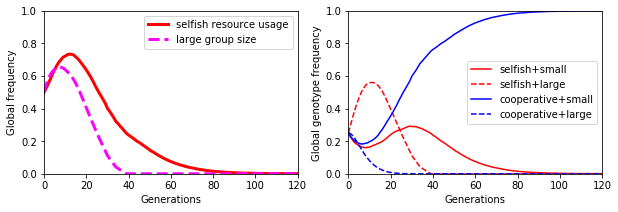

In [66]:
import matplotlib.pyplot as plt 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))

ax1.plot(Generation, Selfish, label = "selfish resource usage",color='red', linewidth=3) 
ax1.plot(Generation, Large, '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta

ax1.set(xlabel='Generations', ylabel='Global frequency')
ax1.set_xlim([0, 120])
ax1.set_ylim([0, 1])
ax1.legend() 

ax2.plot(Generation, N1, label = "selfish+small",color='red') 
ax2.plot(Generation, N2, '--',label = "selfish+large",color='red') 
ax2.plot(Generation, N3, label = "cooperative+small",color='blue') 
ax2.plot(Generation, N4, '--',label = "cooperative+large",color='blue') 

ax2.set(xlabel='Generations', ylabel='Global genotype frequency')
ax2.set_xlim([0, 120])
ax2.set_ylim([0, 1])
ax2.legend() 

In [20]:
fig.savefig('reimplementation.png',bbox_inches='tight')

In [14]:
#extension: introduce mutation
def reproduction_m(t,group,Gs,Cs,Gc,Cc,K,R,m):
    import random
    if t==0:
        Ns_0=sum(1 for i in group if i['trait2']=='selfish')
        Nc_0=sum(1 for i in group if i['trait2']=='cooperative')
        return Ns_0,Nc_0 
    else:
        Ns_last,Nc_last=reproduction(t-1,group,Gs,Cs,Gc,Cc,K,R)

                
        rs=(Ns_last*Gs*Cs*R)/(Ns_last*Gs*Cs+Nc_last*Gc*Cc)
        rc=(Nc_last*Gc*Cc*R)/(Ns_last*Gs*Cs+Nc_last*Gc*Cc)
        Ns_t=Ns_last+rs/Cs-K*Ns_last
        Nc_t=Nc_last+rc/Cc-K*Nc_last
        mu=[]
        for i in range(round(Nc_t)):
            if random.uniform(0, 1)<1/(m*Nc_t):
                mu.append(i)
        Ns_t=Ns_t+len(mu)
        Nc_t=Nc_t-len(mu)
    return Ns_t,Nc_t

In [19]:
GG,NN1,NN2,NN3,NN4,SS,LL=[],[],[],[],[],[],[]
for m in range(1,10):
#for m in [1,2,3,4,5,6,0.2,0.4,0.6,0.8]:    
    #1,initialization
    i1,i2,i3,i4=1000,1000,1000,1000
    i=i1+i2+i3+i4
    p=initialization(i1,i2,i3,i4)
    Selfish,Large=[(i1+i2)/i],[(i2+i4)/i]#for calculating number of selfish strategy individuals and large groups
    Generation,N1,N2,N3,N4=[0],[i1/i],[i2/i],[i3/i],[i4/i]#for calculating the frequency of each genotype

    for iteration in range(120):
        #2,Group Formation
        p_s=[i for i in p if i['trait1']=='small']#individuals with trait1 value of 'small'
        p_l=[i for i in p if i['trait1']=='large']#individuals with trait1 value of 'large'

        g_s=assign_groups([],p_s,4)#small groups
        g_l=assign_groups([],p_l,40)#large groups
        #3,Reproduction
        g_snew=[]
        for group in g_s:
            Ns_t=round(reproduction_m(4,group,0.02,0.2,0.018,0.1,0.1,4,m)[0])
            Nc_t=round(reproduction_m(4,group,0.02,0.2,0.018,0.1,0.1,4,m)[1])
            group_new=[{'trait1':'small','trait2':'selfish'}]*Ns_t+[{'trait1':'small','trait2':'cooperative'}]*Nc_t
            g_snew.append(group_new)
        g_lnew=[]
        for group in g_l:
            Ns_t=round(reproduction_m(4,group,0.02,0.2,0.018,0.1,0.1,50,m)[0])
            Nc_t=round(reproduction_m(4,group,0.02,0.2,0.018,0.1,0.1,50,m)[1])
            group_new=[{'trait1':'large','trait2':'selfish'}]*Ns_t+[{'trait1':'large','trait2':'cooperative'}]*Nc_t
            g_lnew.append(group_new)   
        #4,Migrant pool formation   
        pool=dispersal(g_snew,g_lnew)
        #5,Rescale the migrant pool back to size N
        p=rescale(pool,i)[0]    
        Generation.append(iteration+1)
        N1.append(rescale(pool,i)[1])
        N2.append(rescale(pool,i)[2])
        N3.append(rescale(pool,i)[3])
        N4.append(rescale(pool,i)[4])
        Selfish.append(rescale(pool,i)[1]+rescale(pool,i)[2])    
        Large.append((sum(len(g) for g in g_lnew))/(sum(len(g) for g in g_lnew)+sum(len(g) for g in g_snew)))
    GG.append(Generation);NN1.append(N1);NN2.append(N2);NN3.append(N3);NN4.append(N4);SS.append(Selfish);LL.append(Large)        

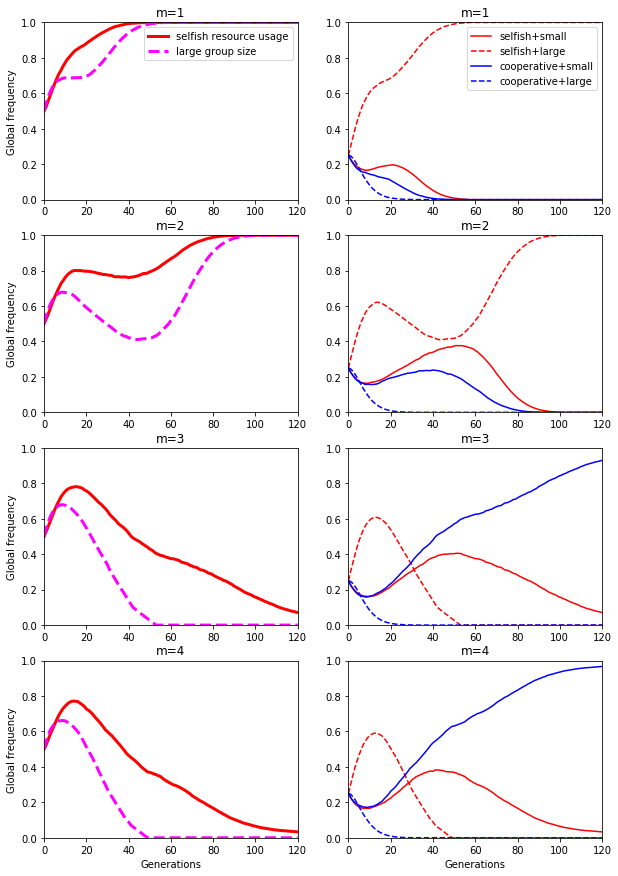

In [20]:
import matplotlib.pyplot as plt 
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]) = plt.subplots(4, 2,figsize=(10,15))

ax1.plot(GG[0], SS[0], label = "selfish resource usage",color='red', linewidth=3) 
ax1.plot(GG[0], LL[0], '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta
ax1.set(ylabel='Global frequency');ax1.set_xlim([0, 120]);ax1.set_ylim([0, 1]);ax1.legend();ax1.title.set_text('m=1') 

ax2.plot(GG[0], NN1[0], label = "selfish+small",color='red') 
ax2.plot(GG[0], NN2[0], '--',label = "selfish+large",color='red') 
ax2.plot(GG[0], NN3[0], label = "cooperative+small",color='blue') 
ax2.plot(GG[0], NN4[0], '--',label = "cooperative+large",color='blue') 
ax2.set_xlim([0, 120]);ax2.set_ylim([0, 1]);ax2.legend() ;ax2.title.set_text('m=1') 


ax3.plot(GG[1], SS[1], label = "selfish resource usage",color='red', linewidth=3) 
ax3.plot(GG[1], LL[1], '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta
ax3.set(ylabel='Global frequency');ax3.set_xlim([0, 120]);ax3.set_ylim([0, 1]);ax3.title.set_text('m=2') 

ax4.plot(GG[1], NN1[1], label = "selfish+small",color='red') 
ax4.plot(GG[1], NN2[1], '--',label = "selfish+large",color='red') 
ax4.plot(GG[1], NN3[1], label = "cooperative+small",color='blue') 
ax4.plot(GG[1], NN4[1], '--',label = "cooperative+large",color='blue') 
ax4.set_xlim([0, 120]);ax4.set_ylim([0, 1]);ax4.title.set_text('m=2') 


ax5.plot(GG[2], SS[2], label = "selfish resource usage",color='red', linewidth=3) 
ax5.plot(GG[2], LL[2], '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta
ax5.set(ylabel='Global frequency');ax5.set_xlim([0, 120]);ax5.set_ylim([0, 1]);ax5.title.set_text('m=3') 

ax6.plot(GG[2], NN1[2], label = "selfish+small",color='red') 
ax6.plot(GG[2], NN2[2], '--',label = "selfish+large",color='red') 
ax6.plot(GG[2], NN3[2], label = "cooperative+small",color='blue') 
ax6.plot(GG[2], NN4[2], '--',label = "cooperative+large",color='blue') 
ax6.set_xlim([0, 120]);ax6.set_ylim([0, 1]);ax6.title.set_text('m=3') 


ax7.plot(GG[3], SS[3], label = "selfish resource usage",color='red', linewidth=3) 
ax7.plot(GG[3], LL[3], '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta
ax7.set(xlabel='Generations', ylabel='Global frequency');ax7.set_xlim([0, 120]);ax7.set_ylim([0, 1]);ax7.title.set_text('m=4') 

ax8.plot(GG[3], NN1[3], label = "selfish+small",color='red') 
ax8.plot(GG[3], NN2[3], '--',label = "selfish+large",color='red') 
ax8.plot(GG[3], NN3[3], label = "cooperative+small",color='blue') 
ax8.plot(GG[3], NN4[3], '--',label = "cooperative+large",color='blue') 
ax8.set(xlabel='Generations');ax8.set_xlim([0, 120]);ax8.set_ylim([0, 1]);ax8.title.set_text('m=4') 

# ax9.plot(GG[7], SS[7], label = "selfish resource usage",color='red', linewidth=3) 
# ax9.plot(GG[7], LL[7], '--',label = "large group size",color='magenta', linewidth=3) #blue+red=magenta
# ax9.set(xlabel='Generations', ylabel='Global frequency');ax9.set_xlim([0, 120]);ax9.set_ylim([0, 1]);ax9.title.set_text('m=5') 

# ax10.plot(GG[7], NN1[7], label = "selfish+small",color='red') 
# ax10.plot(GG[7], NN2[7], '--',label = "selfish+large",color='red') 
# ax10.plot(GG[7], NN3[7], label = "cooperative+small",color='blue') 
# ax10.plot(GG[7], NN4[7], '--',label = "cooperative+large",color='blue') 
# ax10.set(xlabel='Generations', ylabel='Global genotype frequency');ax10.set_xlim([0, 120]);ax10.set_ylim([0, 1]);ax10.title.set_text('m=5') 


In [92]:
fig.savefig('extension.png',bbox_inches='tight')